In [1]:
#importing the packages
import pandas as pd
import numpy as np
import random 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import joblib # for saving algorithm and preprocessing objects
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# uploading the dataset
df = pd.read_csv('pollution_us_2000_2016.csv')
df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [3]:
print(df.columns)

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')


In [4]:
print(df.shape)

(1746661, 29)


In [5]:
print(df.describe())

         Unnamed: 0    State Code   County Code      Site Num      NO2 Mean  \
count  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06   
mean   5.471414e+04  2.230907e+01  7.169381e+01  1.118214e+03  1.282193e+01   
std    3.372908e+04  1.725621e+01  7.948023e+01  2.003103e+03  9.504814e+00   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 -2.000000e+00   
25%    2.575300e+04  6.000000e+00  1.700000e+01  9.000000e+00  5.750000e+00   
50%    5.304500e+04  1.700000e+01  5.900000e+01  6.000000e+01  1.073913e+01   
75%    8.033600e+04  4.000000e+01  9.700000e+01  1.039000e+03  1.771364e+01   
max    1.345750e+05  8.000000e+01  6.500000e+02  9.997000e+03  1.395417e+02   

       NO2 1st Max Value  NO2 1st Max Hour       NO2 AQI       O3 Mean  \
count       1.746661e+06      1.746661e+06  1.746661e+06  1.746661e+06   
mean        2.541485e+01      1.173102e+01  2.389822e+01  2.612485e-02   
std         1.599963e+01      7.877501e+00  1.516280e+01  1.136974

In [6]:
#droping all the unnecessary features
df.drop(['Unnamed: 0','State Code', 'County Code', 'Site Num', 'Address', 'County', 'City',
         'NO2 Units', 'O3 Units' ,'SO2 Units', 'CO Units',
         'NO2 1st Max Hour', 'O3 1st Max Hour', 'SO2 1st Max Hour', 'CO 1st Max Hour'], axis=1, inplace=True)

In [7]:
print(df['NO2 AQI'].min())
print(df['NO2 AQI'].max())

print(df['O3 AQI'].min())
print(df['O3 AQI'].max())

print(df['SO2 AQI'].min())
print(df['SO2 AQI'].max())

print(df['CO AQI'].min())
print(df['CO AQI'].max())

0
132
0
218
0.0
200.0
0.0
201.0


In [8]:
#IQR range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#removing Outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1342531, 14)

In [9]:
print(df['NO2 AQI'].min())
print(df['NO2 AQI'].max())

print(df['O3 AQI'].min())
print(df['O3 AQI'].max())

print(df['SO2 AQI'].min())
print(df['SO2 AQI'].max())

print(df['CO AQI'].min())
print(df['CO AQI'].max())

0
64
1
67
0.0
16.0
0.0
17.0


In [10]:
#encoding dates
df.insert(loc=1, column='Year', value=df['Date Local'].apply(lambda year: year.split('-')[0])) 
df.drop('Date Local', axis=1, inplace=True)
df['Year']=df['Year'].astype('int')

In [11]:
#filling the FIRST Nan values with the means by the state
for i in df.columns[2:]:
    df[i] = df[i].fillna(df.groupby('State')[i].transform('mean'))

In [12]:
# grouped data by state and year
dfG = df.groupby(['State', 'Year']).mean().reset_index()

In [13]:
dfG[dfG['State']=='Hawaii']['NO2 Mean'].min()

2.8690989721401374

In [14]:
#function for inserting a row
def Insert_row_(row_number, df, row_value): 
    # Slice the upper half of the dataframe 
    df1 = df[0:row_number] 
   
    # Store the result of lower half of the dataframe 
    df2 = df[row_number:] 
   
    # Inser the row in the upper half dataframe 
    df1.loc[row_number]=row_value 
   
    # Concat the two dataframes 
    df_result = pd.concat([df1, df2]) 
   
    # Reassign the index labels 
    df_result.index = [*range(df_result.shape[0])] 
   
    # Return the updated dataframe 
    return df_result 

In [15]:
#all the years
year_list = df['Year'].unique()
print(year_list)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]


In [16]:
#all the states
state_list = df['State'].unique()
print(state_list)

['Arizona' 'California' 'Colorado' 'District Of Columbia' 'Florida'
 'Illinois' 'Indiana' 'Kansas' 'Kentucky' 'Louisiana' 'Michigan'
 'Missouri' 'New Jersey' 'New York' 'North Carolina' 'Oklahoma'
 'Pennsylvania' 'Texas' 'Virginia' 'Massachusetts' 'Nevada'
 'New Hampshire' 'South Carolina' 'Connecticut' 'Iowa' 'Maine' 'Maryland'
 'Wisconsin' 'Country Of Mexico' 'Arkansas' 'Oregon' 'Wyoming'
 'North Dakota' 'Tennessee' 'Idaho' 'Ohio' 'Georgia' 'Delaware' 'Hawaii'
 'Minnesota' 'New Mexico' 'Rhode Island' 'South Dakota' 'Utah' 'Alabama'
 'Washington' 'Alaska']


In [17]:
dfG.shape

(494, 14)

In [18]:
dfG.describe()

,Year,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,2009.212551,10.747558,22.650210,21.228981,0.025932,0.037521,32.867243,1.165419,2.646242,3.607843,0.301163,0.465804,4.619578
std,4.743883,4.371782,7.670828,7.291912,0.004144,0.004823,4.283865,0.834911,1.578448,1.973271,0.126349,0.176256,1.580695
min,2000.000000,0.763530,1.553147,1.090909,0.012132,0.018829,17.441441,-0.033596,0.066333,0.250052,0.002597,0.021333,0.917960
25%,2006.000000,7.633976,17.124724,15.868921,0.023651,0.034929,30.528781,0.536178,1.388853,1.951765,0.216226,0.347940,3.556522
50%,2010.000000,10.617999,22.947007,21.510045,0.025795,0.037845,32.990058,0.936485,2.251052,3.371520,0.279248,0.445796,4.606004
75%,2013.000000,13.750441,28.125989,26.414369,0.028015,0.040523,35.538569,1.607425,3.776081,5.155856,0.366176,0.575920,5.613148
max,2016.000000,25.942308,42.745318,40.415730,0.040835,0.050165,43.147165,4.307074,6.656213,7.935345,0.721985,1.094762,10.577235


In [19]:
# add more years with NaN values
for state in state_list:
    year_diff = set(year_list).difference(list(dfG[dfG['State']==state]['Year']))
    for i in year_diff:
        if i == 2000:
            row_value = [state, i, 25.9423, 42.7453, 40.4157, 0.0408353, 0.0501655, 43.1472, 4.30707, 6.65621, 7.93535, 0.721985, 1.094762, 10.577235]
        elif i == 2016:
            row_value = [state, i, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        else:
            row_value = [state, i, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
        dfG = Insert_row_(random.randint(1,494), dfG, row_value) 

c:\users\khud4\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
# replacing Nan values by interpolation by state
groups = []
i = 0
for _, group in dfG.groupby('State'):
    a = group.sort_values(by='Year').interpolate()
    groups.append(a)
    
final_df = pd.DataFrame(columns=list(groups[0].columns) )
for g in groups:
    final_df = final_df.append(g, ignore_index = True) 

In [21]:
# calculating the average AQI
average_AQI = (final_df['NO2 AQI'] + final_df['SO2 AQI'] + \
              final_df['CO AQI'] + final_df['O3 AQI']) / 4 
final_df.insert(loc=len(final_df.columns), column='average_AQI', value=average_AQI)

In [22]:
final_df.head()

,State,Year,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI,average_AQI
0,Alabama,2000,25.942300,42.745300,40.415700,0.040835,0.050166,43.147200,4.307070,6.656210,7.935350,0.721985,1.094762,10.577235,25.518871
1,Alabama,2001,24.836148,41.226431,38.945961,0.038671,0.047900,41.303709,4.019606,6.322935,7.601124,0.681499,1.043165,10.058523,24.477329
2,Alabama,2002,23.729996,39.707562,37.476222,0.036506,0.045634,39.460218,3.732141,5.989660,7.266898,0.641013,0.991568,9.539811,23.435787
3,Alabama,2003,22.623844,38.188692,36.006483,0.034342,0.043368,37.616727,3.444677,5.656385,6.932672,0.600527,0.939971,9.021099,22.394245
4,Alabama,2004,21.517691,36.669823,34.536743,0.032177,0.041102,35.773236,3.157213,5.323110,6.598446,0.560041,0.888374,8.502387,21.352703


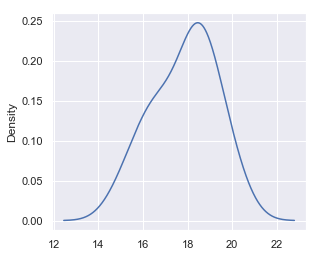

In [23]:
final_df[final_df["State"]=='Missouri']['average_AQI'].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

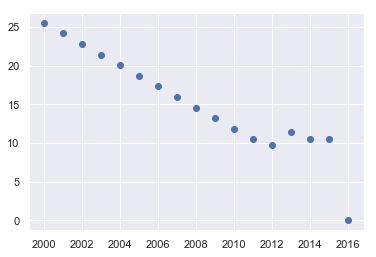

In [24]:
plt.scatter(final_df[final_df['State']=='Hawaii']['Year'], final_df[final_df['State']=='Hawaii']['average_AQI']);

In [25]:
final_df.describe()

,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI,average_AQI
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,12.506135,24.503036,23.018256,0.027323,0.037845,32.939714,1.628731,3.180411,4.108650,0.348866,0.536432,5.257414,16.331009
std,6.181401,9.875976,9.380635,0.007639,0.008956,7.728992,1.197977,1.868039,2.224614,0.173708,0.254680,2.370912,4.555440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.033596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.282999,17.927045,16.834896,0.023912,0.035140,30.574777,0.672567,1.613456,2.286006,0.226050,0.362685,3.671023,14.118405
50%,11.905754,24.776050,23.194175,0.026923,0.038646,33.609865,1.287237,2.921135,3.978173,0.313321,0.500632,5.047505,16.200972
75%,16.535877,31.257269,29.468572,0.031427,0.043253,37.632426,2.418300,4.817278,5.987795,0.459778,0.704466,6.749255,18.792651
max,25.942308,42.745318,40.415730,0.040835,0.050166,43.147200,4.307074,6.656213,7.935350,0.721985,1.094762,10.577235,25.518871


In [26]:
joblib.dump(final_df, "./processed_data.joblib", compress=True)
testing_Data = joblib.load("./processed_data.joblib")

In [27]:
def state_data(state, data, df):
    
    t = df[df['State']==state].sort_values(by='Year')
    
    clf = LinearRegression()
    clf.fit(t[['Year']], t[data])
    
    years = np.arange(2017, 2026, 1)
    
    tt = pd.DataFrame({'Year': years, data: clf.predict(years.reshape(-1, 1))})
    pd.concat([t, tt], sort=False).set_index('Year')[data].plot(color='red')
    t.set_index('Year')[data].plot(figsize=(15, 5), xticks=(np.arange(2000, 2026, 1)))
    
    return print(clf.predict(years.reshape(-1, 1)))

[15.47519719 15.2106967  14.9461962  14.6816957  14.41719521 14.15269471
 13.88819421 13.62369371 13.35919322]


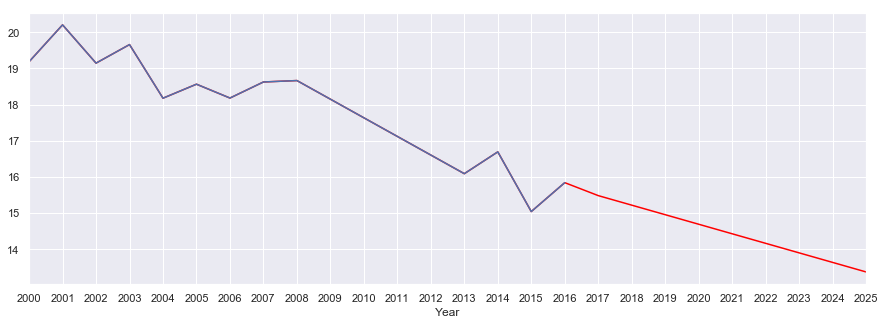

In [28]:
state_data('Missouri', 'average_AQI', final_df)